## Metoda Szablonowa (ang. Template Method)

**Typ**: behawioralny \
**Zakres**: klasowy

<div style="border: solid 1px;padding: 20px;text-align: center">
    Wzorzec <b>metoda szablonowa</b> definiuje szkielet algorytmu w metodzie, pozostawiając implementację niektórych kroków podklasom. Podklasy mogą przedefiniować pewne kroki algorytmu bez zmiany jego struktury.
</div>

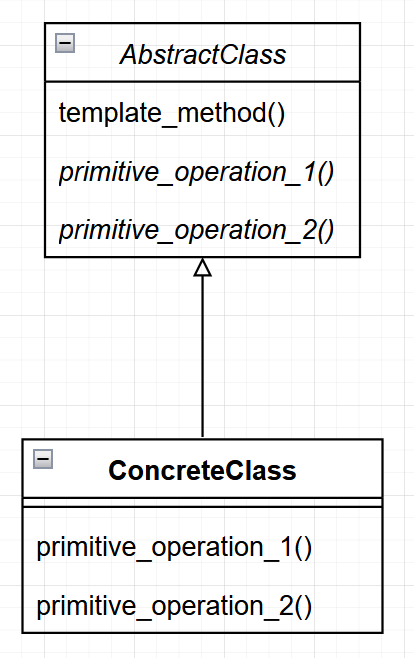

### Problem - duplikacja algorytmu

Przygotowujesz napoje: kawę i herbatę.

**Proces przygotowania (prawie identyczny):**
1. Zagotuj wodę
2. Zaparz (kawa → kawę, herbata → herbatę)
3. Wlej do kubka
4. Dodaj dodatki (kawa → mleko/cukier, herbata → cytryna)

**Problem:** Jak uniknąć duplikacji kroków 1 i 3?

### Naiwne podejście - duplikacja kodu

In [ ]:
class Coffee:
    def prepare(self):
        print("1. Gotuję wodę")           # ← Duplikacja!
        print("2. Zaparzam kawę")
        print("3. Wlewam do kubka")       # ← Duplikacja!
        print("4. Dodaję mleko i cukier")


class Tea:
    def prepare(self):
        print("1. Gotuję wodę")           # ← Duplikacja!
        print("2. Zaparzam herbatę")
        print("3. Wlewam do kubka")       # ← Duplikacja!
        print("4. Dodaję cytrynę")

In [ ]:
print("=== Kawa ===")
coffee = Coffee()
coffee.prepare()

print("\n=== Herbata ===")
tea = Tea()
tea.prepare()

**Problemy:**
- ❌ Kroki 1 i 3 **zduplikowane**
- ❌ Zmiana "Gotuję wodę" → **trzeba zmienić w 2 miejscach**
- ❌ Dodanie kroku (np. "5. Podaj") → **zmiana obu klas**
- ❌ **Brak wspólnej struktury**

### Rozwiązanie - wzorzec Metoda Szablonowa

**Idea:** Wspólny **szkielet algorytmu** w klasie bazowej, konkretne **kroki** w podklasach.

### Krok 1: Klasa abstrakcyjna z metodą szablonową

In [ ]:
from abc import ABC, abstractmethod

class Beverage(ABC):
    """Klasa bazowa definiująca szkielet algorytmu"""
    
    # ════════════════════════════════════════════════════════════
    # METODA SZABLONOWA - szkielet algorytmu
    # ════════════════════════════════════════════════════════════
    def prepare(self):
        """Metoda szablonowa - definiuje kolejność kroków"""
        self.boil_water()      # Wspólny krok
        self.brew()            # Abstrakcyjny - różny dla podklas
        self.pour_in_cup()     # Wspólny krok
        self.add_condiments()  # Abstrakcyjny - różny dla podklas
    
    # ════════════════════════════════════════════════════════════
    # WSPÓLNE KROKI - zaimplementowane w klasie bazowej
    # ════════════════════════════════════════════════════════════
    def boil_water(self):
        print("1. Gotuję wodę")
    
    def pour_in_cup(self):
        print("3. Wlewam do kubka")
    
    # ════════════════════════════════════════════════════════════
    # ABSTRAKCYJNE KROKI - podklasy muszą zaimplementować
    # ════════════════════════════════════════════════════════════
    @abstractmethod
    def brew(self):
        """Zaparzanie - różne dla kawy i herbaty"""
        pass
    
    @abstractmethod
    def add_condiments(self):
        """Dodatki - różne dla kawy i herbaty"""
        pass

**Kluczowe elementy:**
- `prepare()` - **metoda szablonowa** (szkielet algorytmu)
- `boil_water()`, `pour_in_cup()` - **wspólne kroki**
- `brew()`, `add_condiments()` - **abstrakcyjne kroki** (do zaimplementowania)

### Krok 2: Konkretne podklasy

In [ ]:
class Coffee(Beverage):
    """Kawa - implementuje tylko unikalne kroki"""
    
    def brew(self):
        print("2. Zaparzam kawę")
    
    def add_condiments(self):
        print("4. Dodaję mleko i cukier")


class Tea(Beverage):
    """Herbata - implementuje tylko unikalne kroki"""
    
    def brew(self):
        print("2. Zaparzam herbatę")
    
    def add_condiments(self):
        print("4. Dodaję cytrynę")

**Podklasy:**
- **NIE duplikują** kroków wspólnych
- Implementują **tylko** unikalne kroki
- **Dziedziczą** `prepare()` (metodę szablonową)

### Krok 3: Użycie - ten sam interfejs

In [ ]:
print("=== Kawa ===")
coffee = Coffee()
coffee.prepare()  # Wywołuje metodę szablonową

print("\n=== Herbata ===")
tea = Tea()
tea.prepare()  # Ta sama metoda szablonowa!

**Zalety:**
- ✅ **Brak duplikacji** - wspólne kroki w klasie bazowej
- ✅ Zmiana "Gotuję wodę" → **jedno miejsce**
- ✅ **Struktura zagwarantowana** - `prepare()` zawsze wywołuje kroki w tej samej kolejności
- ✅ **Open/Closed** - nowy napój = nowa podklasa (bez zmiany `Beverage`)

## Jak to działa?

```python
coffee = Coffee()
coffee.prepare()
    ↓
    # Metoda szablonowa z klasy bazowej Beverage
    self.boil_water()      # Beverage.boil_water()      → "Gotuję wodę"
    self.brew()            # Coffee.brew()              → "Zaparzam kawę"
    self.pour_in_cup()     # Beverage.pour_in_cup()     → "Wlewam do kubka"
    self.add_condiments()  # Coffee.add_condiments()    → "Dodaję mleko i cukier"
```

**Metoda szablonowa (`prepare()`) kontroluje kolejność i wywołuje metody w ustalonej sekwencji.**

## Hook methods (punkty zaczepienia, haczyki)

**Hook** - opcjonalna metoda, którą podklasa **może** (ale nie musi) nadpisać.

**Różnica:**
- **Metoda abstrakcyjna** - podklasa **musi** zaimplementować
- **Hook** - podklasa **może** zaimplementować (domyślna implementacja w klasie bazowej)

In [ ]:
from abc import ABC, abstractmethod

class Beverage(ABC):
    def prepare(self):
        self.boil_water()
        self.brew()
        self.pour_in_cup()
        
        # Hook - tylko jeśli klient chce dodatki
        if self.customer_wants_condiments():
            self.add_condiments()
    
    def boil_water(self):
        print("1. Gotuję wodę")
    
    def pour_in_cup(self):
        print("3. Wlewam do kubka")
    
    @abstractmethod
    def brew(self):
        pass
    
    @abstractmethod
    def add_condiments(self):
        pass
    
    # ════════════════════════════════════════════════════════════
    # HOOK - domyślna implementacja, podklasa może nadpisać
    # ════════════════════════════════════════════════════════════
    def customer_wants_condiments(self) -> bool:
        """Hook - domyślnie True, podklasa może zmienić"""
        return True

In [ ]:
class Coffee(Beverage):
    def brew(self):
        print("2. Zaparzam kawę")
    
    def add_condiments(self):
        print("4. Dodaję mleko i cukier")
    
    # Nadpisujemy hook - kawa bez dodatków
    def customer_wants_condiments(self) -> bool:
        return False  # Bez dodatków!


class Tea(Beverage):
    def brew(self):
        print("2. Zaparzam herbatę")
    
    def add_condiments(self):
        print("4. Dodaję cytrynę")
    
    # NIE nadpisujemy hooka - herbata z dodatkami (domyślnie True)

In [ ]:
print("=== Kawa (bez dodatków) ===")
coffee = Coffee()
coffee.prepare()  # Hook zwraca False - pomija add_condiments()

print("\n=== Herbata (z dodatkami) ===")
tea = Tea()
tea.prepare()  # Hook zwraca True - wywołuje add_condiments()

**Dzięki wykorzystaniu hook-ów podklasy mogą "wpiąć się" w algorytm i zmienić jego zachowanie.**

## Przykład 2 - Generowanie raportów

In [ ]:
from abc import ABC, abstractmethod

# ════════════════════════════════════════════════════════════
# Klasa bazowa z metodą szablonową
# ════════════════════════════════════════════════════════════
class Report(ABC):
    """Szablon generowania raportu"""
    
    # METODA SZABLONOWA
    def generate(self):
        """Szkielet algorytmu generowania raportu"""
        self.gather_data()      # Wspólne
        self.format_header()    # Różne dla PDF/HTML
        self.format_body()      # Różne dla PDF/HTML
        self.format_footer()    # Różne dla PDF/HTML
        self.save()             # Wspólne
    
    # WSPÓLNE KROKI
    def gather_data(self):
        print("📊 Pobieram dane z bazy...")
    
    def save(self):
        print("💾 Zapisuję raport\n")
    
    # ABSTRAKCYJNE KROKI
    @abstractmethod
    def format_header(self):
        pass
    
    @abstractmethod
    def format_body(self):
        pass
    
    @abstractmethod
    def format_footer(self):
        pass


# ════════════════════════════════════════════════════════════
# Konkretne podklasy
# ════════════════════════════════════════════════════════════
class PDFReport(Report):
    def format_header(self):
        print("📄 Formatuję nagłówek PDF")
    
    def format_body(self):
        print("📄 Formatuję treść PDF")
    
    def format_footer(self):
        print("📄 Formatuję stopkę PDF")


class HTMLReport(Report):
    def format_header(self):
        print("🌐 Formatuję nagłówek HTML")
    
    def format_body(self):
        print("🌐 Formatuję treść HTML")
    
    def format_footer(self):
        print("🌐 Formatuję stopkę HTML")

In [ ]:
print("=== Raport PDF ===")
pdf = PDFReport()
pdf.generate()

print("=== Raport HTML ===")
html = HTMLReport()
html.generate()

## Struktura wzorca

**Elementy wzorca Metoda Szablonowa:**

1. **AbstractClass** - `Beverage`, `Report`
   - Definiuje **metodę szablonową** (szkielet algorytmu)
   - Implementuje **wspólne kroki**
   - Deklaruje **metody abstrakcyjne** (kroki do zaimplementowania)
   - Opcjonalnie: **hooki** (domyślne implementacje)

2. **ConcreteClass** - `Coffee`, `Tea`, `PDFReport`, `HTMLReport`
   - Implementuje **abstrakcyjne kroki**
   - Opcjonalnie: nadpisuje **hooki**
   - **Dziedziczy** metodę szablonową

**Kluczowa właściwość:**
> Metoda szablonowa **kontroluje** algorytm. Podklasy **nie mogą** zmienić struktury, tylko **konkretne kroki**.

## Kiedy używać wzorca Metoda Szablonowa?

Wzorzec Metoda Szablonowa stosuj gdy:

1. **Algorytm ma stałą strukturę**
   - Kolejność kroków zawsze taka sama
   - Ale niektóre kroki różnią się

2. **Duplikacja kodu w podklasach**
   - Wspólne kroki powtarzane w wielu miejscach

3. **Chcesz kontrolować punkty rozszerzenia**
   - Podklasy mogą nadpisać tylko konkretne kroki
   - Nie mogą zmienić struktury algorytmu

4. **"Hollywood Principle" - "Don't call us, we'll call you"**
   - Klasa bazowa wywołuje metody podklas
   - Podklasy **nie** kontrolują algorytmu

**Przykłady praktyczne:**
- Frameworks (np. Django views, Flask request handling)


## Metoda Szablonowa vs Strategia

**Oba wzorce pozwalają zmienić części algorytmu, ale:**

| Aspekt | Metoda Szablonowa | Strategia |
|--------|-------------------|----------|
| **Mechanizm** | Dziedziczenie | Kompozycja |
| **Zmiana** | W czasie kompilacji (podklasa) | W czasie działania (zmiana strategii) |
| **Kontrola** | Klasa bazowa kontroluje algorytm | Kontekst deleguje cały algorytm |
| **Elastyczność** | ⚠️ Mniejsza (statyczna) | ✅ Większa (dynamiczna) |
| **Cel** | Wydzielenie wspólnego kodu | Wymienialny algorytm |

**Metoda Szablonowa:**
```python
class Coffee(Beverage):  # Dziedziczenie
    def brew(self):
        print("Zaparzam kawę")

coffee = Coffee()
coffee.prepare()  # Szkielet z Beverage, brew() z Coffee
```

**Strategia:**
```python
sorter = Sorter(QuickSort())  # Kompozycja
sorter.sort(data)

sorter.set_strategy(MergeSort())  # Zmiana w runtime!
sorter.sort(data)
```

## Podsumowanie

Wzorzec Metoda Szablonowa:
- ✅ **Eliminuje duplikację** wspólnych kroków
- ✅ **Kontroluje strukturę** algorytmu (stała kolejność)
- ✅ **Open/Closed** - rozszerzanie przez podklasy
- ✅ **Code reuse** - wspólne kroki w jednym miejscu
- ✅ **Hollywood Principle** - "Don't call us, we'll call you"
- ⚠️ **Dziedziczenie** - mniej elastyczne niż kompozycja
- ⚠️ **Statyczne** - zmiana tylko w czasie kompilacji

**Kluczowa idea:**
> **Szkielet** algorytmu w klasie bazowej, **konkretne kroki** w podklasach

**Struktura:**
```python
class AbstractClass:
    # METODA SZABLONOWA - szkielet
    def template_method(self):
        self.step1()      # Wspólny
        self.step2()      # Abstrakcyjny (różny w podklasach)
        self.step3()      # Wspólny
    
    def step1(self):
        # Implementacja wspólna
        pass
    
    @abstractmethod
    def step2(self):
        # Podklasy muszą zaimplementować
        pass
    
    def step3(self):
        # Implementacja wspólna
        pass

class ConcreteClass(AbstractClass):
    def step2(self):
        # Konkretna implementacja
        pass
```

**Istota wzorca:**
- **Szkielet algorytmu:** Metoda szablonowa definiuje kolejność
- **Wspólne kroki:** Zaimplementowane w klasie bazowej (brak duplikacji)
- **Abstrakcyjne kroki:** Podklasy implementują różnice
- **Hooki:** Opcjonalne punkty rozszerzenia

**Formuła:**
- Metoda szablonowa = `step1() + step2() + step3()` (kolejność stała)
- Podklasy = implementują tylko `step2()` (unikalny krok)
- Klasa bazowa = kontroluje algorytm, wywołuje metody podklas